# Review Notebook for Sense Filtering by Time and Provenance

This notebook builds on 4.1 (harvest senses with provenance) and 4.2 (harvest quotations for senses). The code in this notebook allows you to filter senses by (a) selecting seed senses (b) defining relations words should have to the seed senses.

Functions reviewed in this notebook:
- `filter_by_year_range` (helper)
- `select_senses_by_provenance`(helper)
- `filter_senses` (main)

Part of:
- `utils.dataset_download`

Creator: Kaspar Beelen

Reviewer(s):


In [166]:
!git branch

  1-dataframe
  19-machine-tagger
  3-group-senses
* 4-semantic-provenance
  dev
  master
  oed-experiments


## Load libraries, data and set parameters

In [167]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
%autoreload 2

In [169]:
import pandas as pd
import json
from utils.dataset_download import *

In [170]:
lemma_id = 'machine_nn01'

In [171]:
# import API credentials
with open('oed_experiments/oed_credentials.json') as f:
    auth = json.load(f)

In [172]:
df = pd.read_pickle(f'./data/extended_{lemma_id}.pickle')

In [173]:
df.head(3)

,categories,daterange,definition,first_use,id,lemma,main_current_sense,meta,notes,oed_reference,oed_url,part_of_speech,provenance,provenance_type,quotation_ids,semantic_class_ids,semantic_class_last_id,transitivity,word_id
0,"{'topic': [], 'usage': [['rare']], 'region': []}","{'end': None, 'start': 1545, 'obsolete': False...","A material or immaterial structure, esp. the f...",J. Schäfer,machine_nn01-38473945,machine,False,"{'created': 1904, 'revised': True, 'updated': ...",[],"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473945,NN,"[[machine_nn01-38473945, seed, machine_nn01]]",seed,"[machine_nn01-38473950, machine_nn01-38473961,...","[[1, 111290, 118635, 119024, 120162, 120172], ...","[120172, 120173]",None,machine_nn01
1,"{'topic': [['Military', 'Weaponry']], 'usage':...","{'end': None, 'start': 1583, 'obsolete': False...",A military engine or siege-tower. Cf. war mach...,Brian Melbancke,machine_nn01-38474233,machine,False,"{'created': 1904, 'revised': True, 'updated': ...",[],"machine, n., sense II.3",https://www.oed.com/view/Entry/111850#eid38474233,NN,"[[machine_nn01-38474233, seed, machine_nn01]]",seed,"[machine_nn01-38474243, machine_nn01-38474252,...","[[153072, 160439, 163207, 163208, 163377, 1633...",[163378],None,machine_nn01
2,"{'topic': [], 'usage': [], 'region': []}","{'end': 1707, 'start': 1595, 'obsolete': True,...",spec. A scheme or plot. Obsolete.,Elizabeth I,machine_nn01-38474097,machine,False,"{'created': 1904, 'revised': True, 'updated': ...",[],"machine, n., sense I.1b",https://www.oed.com/view/Entry/111850#eid38474097,NN,"[[machine_nn01-38474097, seed, machine_nn01]]",seed,"[machine_nn01-38474102, machine_nn01-38474122,...","[[1, 84689, 87987, 87988, 87989, 88083, 88109,...",[88126],None,machine_nn01


In [174]:
df_quotations = pd.read_pickle(f'./data/quotations_{lemma_id}.pickle')

In [175]:
df_quotations.head()

,id,text,year,lemma,source,oed_url,word_id,sense_id,datestring,first_in_word,oed_reference,first_in_sense
0,topbox_nn01-18004656,"{'keyword': 'topbox', 'full_text': '1975 Yamah...",1976,top box,"{'title': 'Eastern Daily Press (Norwich)', 'au...",https://www.oed.com/view/Entry/203331#eid18004656,topbox_nn01,topbox_nn01-18003800,1976,True,"‘top box’ in top, n.1",True
1,tiltmeter_nn01-18432234,"{'keyword': 'tiltmeters', 'full_text': 'In bot...",1937,tiltmeter,"{'title': 'Nature', 'author': None, 'gender': ...",https://www.oed.com/view/Entry/202039#eid18432234,tiltmeter_nn01,tiltmeter_nn01-18432090,1937,True,"‘tiltmeter’ in tilt, n.2",True
2,tiltmeter_nn01-18432242,"{'keyword': 'tiltmeters', 'full_text': 'Everyt...",1980,tiltmeter,"{'title': 'New Scientist', 'author': None, 'ge...",https://www.oed.com/view/Entry/202039#eid18432242,tiltmeter_nn01,tiltmeter_nn01-18432090,1980,False,"‘tiltmeter’ in tilt, n.2",False
3,privymember_nn01-97053507,"{'keyword': None, 'full_text': '', 'keyword_of...",1325,privy member,"{'title': None, 'author': None, 'gender': None}",https://www.oed.com/view/Entry/151635#eid97053507,privymember_nn01,privymember_nn01-28448956,c1325,False,"‘privy member’ in privy, adj., n., and adv.",False
4,privymember_nn01-28448979,"{'keyword': None, 'full_text': 'Adam..toke of ...",1470,privy member,"{'title': 'R. D'Argenteuil's French Bible', 'a...",https://www.oed.com/view/Entry/151635#eid28448979,privymember_nn01,privymember_nn01-28448956,c1470,False,"‘privy member’ in privy, adj., n., and adv.",False


# Run code

In [176]:
set(df[df.id.isin(['machine_nn01-38475835','machine_nn01-38475923'])].definition)

{'A conceptual, abstract, or theoretical mechanism or device; spec. a model or a mathematical abstraction of an existing or hypothetical computer. Cf. Turing machine n.',
 'Mechanics. Anything that transmits force or directs its application.'}

In [177]:
senses = filter_senses(df,
                       {'machine_nn01-38475835','machine_nn01-38475923'},
                       ['seed','synonym','descendant'],
                       start=1760, 
                       end=1920
                      )

# senses before filtering by date = 8383
# senses after filtering by date = 5918


# of seed senses 22 
# of synonyms 310 
# of branch senses 4990


# of seeds selected 1 
# of synonyms selected 8 
# of branches selected 10


In [178]:
senses

{'accumulator_nn01-34592667',
 'commutator_nn01-8782500',
 'compressor_nn01-8608218',
 'compressor_nn01-8608248',
 'dynamo_nn01-5878672',
 'energizer_nn01-1246574970',
 'generator_nn01-135539783',
 'heatexchanger_nn01-1908252',
 'inductordisk_nn01-1192999040',
 'inductorplate_nn01-1192999070',
 'lever_nn01-39377191',
 'leverage_nn01-39378231',
 'machine_nn01-38475923',
 'machinepower_nn01-38476982',
 'mechanicaladvantage_nn01-37502752',
 'mover_nn01-35820685',
 'pair_nn01-32480956',
 'pairing_nn02-32485248',
 'peritrochium_nn01-30868432',
 'power_nn01-28687898',
 'primemover_nn01-28348676',
 'primummobile_nn01-28369573',
 'prise_nn03-28455147',
 'purchase_nn01-27522250',
 'rocker_nn01-25157825',
 'screw_nn01-24083320',
 'screwcompressor_nn01-24085973',
 'wedge_nn01-14811588',
 'wheel_nn01-14697935'}

In [ ]:
quotations = obtain_quotations_for_senses(df_quotations,senses)
quotations.shape

In [ ]:
quotations.head()

# Inspect code

### Inspect `filter_by_year_range`

In [14]:
def filter_by_year_range(dr: dict, target_start: int, target_end: int) -> bool:
    """
    Helper function that expects a datarange dictionary from the OED
    Is used for filter senses that are outside the historical scope 
    of the research. The date range is defined by the target_start and target_end
    arguments. If the date range of the sense has NO overlap with the
    target period, then return False, otherwise return True
    
    Arguments:
        dr (dict): daterange dict of OED
        target_start (int): start year of target period
        target_end (int): end year of target period
    
    Returns:
        return a boolean, True if there is overlap between
        the target period and the date range of the sense
    """
    # if there is not start date, set to 0
    if dr.get('start',None) is None:
        sense_start = 0
    else:
        sense_start = dr['start']
    
    
    # if there is no end date, set to 2021
    if dr.get('end',None) is None:
        sense_end = 2021
    else:
        sense_end = dr['end']
    
    # if there is an intersection between the target period and sense period empty
    # return True
    if set(range(sense_start,sense_end+1)).intersection(set(range(target_start,target_end+1))):
        return True
    
    # otherwise return False
    return False

In [15]:
# number of senses selected
df['in_period'] = df.daterange.apply(filter_by_year_range, target_start=1760, target_end=1920)
print(sum(df.in_period))

5918


In [16]:
#print(df['in_period'][110:120])

In [17]:
print(df.iloc[0][['daterange','in_period']])
print(df.iloc[2][['daterange','in_period']])
print(df.iloc[70][['daterange','in_period']])
print(df.iloc[88][['daterange','in_period']])
print(df.iloc[89][['daterange','in_period']])

daterange    {'end': None, 'start': 1545, 'obsolete': False...
in_period                                                 True
Name: 0, dtype: object
daterange    {'end': 1707, 'start': 1595, 'obsolete': True,...
in_period                                                False
Name: 2, dtype: object
daterange    {'end': 1642, 'start': 1381, 'obsolete': True,...
in_period                                                False
Name: 44, dtype: object
daterange    {'end': None, 'start': 1940, 'obsolete': False...
in_period                                                False
Name: 62, dtype: object
daterange    {'end': 1874, 'start': 1450, 'obsolete': True,...
in_period                                                 True
Name: 63, dtype: object


### Inspect `select_senses_by_provenance`

In [18]:
def select_senses_by_provenance(sub_df: pd.DataFrame, 
                                item_ids: set, 
                                relations: list) -> tuple:
    """Helper function that given a subsection of a dataframe filters senses based
    on a set of target sense ids and relations. This function requires a dataframe created
    by the extend_from_lemma function.
    
    Arguments:
        sub_df (pd.DataFrame): slice of a pd.DataFrame
        item_ids (set): include senses related to these items 
                        these can be sense ids or semantic class ids
        relations (list): filter based on these relations 
                          options are: seed, synonyms, sibling, descedant
        
    Returns:
        a tuple that contains a list with position indices and a list with items
    """
    
    indices, items = set(),set()
    
    for i, row in sub_df.iterrows():
        for oed_id, relation, prov_id in row.provenance:
            # if the provenance and relation match to the arguments
            # add the items and position to the respective lists
            if (prov_id in item_ids) and (relation in relations):
                indices.add(i) ; items.add(oed_id)
                
    return list(indices), list(items)

In [19]:
sel_indices, selected = select_senses_by_provenance(df, {'machine_nn01-38475835','machine_nn01-38475923'},
                                                        ['synonym'])

In [20]:
selected

['primummobile_nn01-28369573',
 'biocomputer_nn01-11753081',
 'machine_nn01-38475923',
 'machine_nn01-38475835',
 'primemover_nn01-28348676',
 'mechanicaladvantage_nn01-37502752',
 'generator_nn01-135539783',
 'vice_nn02-15526247',
 'machinepower_nn01-38476982',
 'turingmachine_nn01-17499756',
 'energizer_nn01-1246574970',
 'mover_nn01-35820685',
 'power_nn01-28687898']

### Inspect `filter_senses`

In [21]:
def filter_senses(df, sense_ids:set, 
                      relations:list, 
                      start:int, 
                      end:int,
                      verbose=True) -> set:
    """
    Main function that filter sense by a give date range 
    and set of seed senses with provenace relations. 
    The seeds sense are selected from the lemma dataframe
    used as starting point for harvesting. Builds on dataframe created 
    by the extend_from_lemma function.
    
    Returns selected senses as a set. 
    
    Arguments:
        df (pd.DataFrame): main dataframe created by the extend_from_lemma
        senses_ids (set): seeds senses from the lemma used for filtering
        relations (list): filter based on these relations
        start (int): beginning of target period
        end (int): end of target period
        verbose (bool): print outcomes of intermediate steps
    
    Returns:
        set with senses
    """
    print("# senses before filtering by date =", df.shape[0])
    df = df[df.daterange.apply(filter_by_year_range, target_start=start, target_end=end)]
    print("# senses after filtering by date =", df.shape[0])
    
    
    seeds = df[df['provenance_type'] == "seed"].reset_index(inplace=False)
    # select words retrieved as synonyms
    # exclude those that already appear in the seed dataframe
    # reset index after selection
    synonyms = df[(df['provenance_type'] == "synonym") & (~df.id.isin(seeds.id))
                     ].reset_index(inplace=False)
    
    # select words retrieved as a branch of the synonym or a seed sense
    # exclude those that already appear as seed or synonym
    branches = df[(df['provenance_type'] == "branch") & (~df.id.isin(set(seeds.id).union(set(synonyms.id))))
                      ].reset_index(inplace=False)
    
    print("\n\n# of seed senses", seeds.shape[0],
          "\n# of synonyms", synonyms.shape[0],
          "\n# of branch senses", branches.shape[0])

    if "seed" in relations:
        seeds_selected = set(seeds[seeds.id.isin(sense_ids)].id)

    if "synonym" in relations:
        syn_sel_indices, synonyms_selected = select_senses_by_provenance(synonyms,sense_ids,relations)
    
    # as branches are retrieved by semantic class id, we get the semantic class ids 
    # of the seed AND synonyms senses
    select_seed_semantic_class_id = seeds[seeds.id.isin(seeds_selected)].semantic_class_last_id
    select_seed_semantic_class_id = set().union(*map(set,select_seed_semantic_class_id))
    
    select_synonyms_semantic_class_id = synonyms[synonyms.id.isin(synonyms_selected)].semantic_class_last_id
    select_synonyms_semantic_class_id = set().union(*map(set,select_synonyms_semantic_class_id))
    
    selected_semantic_class_id = set(select_seed_semantic_class_id).union(set(select_synonyms_semantic_class_id))
    
    branch_sel_indices, branches_selected = select_senses_by_provenance(branches,selected_semantic_class_id,relations)
    
    
    senses = set(branches.iloc[branch_sel_indices].id # for the branches we return the sense ids not the semantic class ids
               ).union(set(synonyms.iloc[syn_sel_indices].id)
                        ).union(set(seeds_selected))
    if verbose:
        print('\n\n# of seeds selected', len(seeds_selected),
              '\n# of synonyms selected', len(syn_sel_indices),
              '\n# of branches selected', len(branches_selected))
    return senses

In [22]:
senses = filter_senses(df,
                       {'machine_nn01-38475835','machine_nn01-38475923'},
                       ['seed','synonym','descendant'],
                       start=1760, 
                       end=1920
                      )

# senses before filtering by date = 8383
# senses after filtering by date = 5918


# of seed senses 22 
# of synonyms 310 
# of branch senses 4990


# of seeds selected 1 
# of synonyms selected 8 
# of branches selected 10


In [23]:
senses

{'accumulator_nn01-34592667',
 'commutator_nn01-8782500',
 'compressor_nn01-8608218',
 'compressor_nn01-8608248',
 'dynamo_nn01-5878672',
 'energizer_nn01-1246574970',
 'generator_nn01-135539783',
 'heatexchanger_nn01-1908252',
 'inductordisk_nn01-1192999040',
 'inductorplate_nn01-1192999070',
 'lever_nn01-39377191',
 'leverage_nn01-39378231',
 'machine_nn01-38475923',
 'machinepower_nn01-38476982',
 'mechanicaladvantage_nn01-37502752',
 'mover_nn01-35820685',
 'pair_nn01-32480956',
 'pairing_nn02-32485248',
 'peritrochium_nn01-30868432',
 'power_nn01-28687898',
 'primemover_nn01-28348676',
 'primummobile_nn01-28369573',
 'prise_nn03-28455147',
 'purchase_nn01-27522250',
 'rocker_nn01-25157825',
 'screw_nn01-24083320',
 'screwcompressor_nn01-24085973',
 'wedge_nn01-14811588',
 'wheel_nn01-14697935'}

### Inspect `obtain_quotations_for_senses`

In [24]:
def obtain_quotations_for_senses(
                      df_quotations:  pd.DataFrame,
                      senses: set) -> pd.DataFrame:
    """Create a dataframe with quotations and their metadata for 
    a selected set of senses. This function builds on
    harvest_quotations_by_sense_id.
    
    Arguments:
        df_quotations: dataframe with quotations, created using harvest_quotations_by_sense_id
        senses (set): set of senses for which we want to obtain quotations
        
    Returns:
        pd.DataFrame with quotations
        
    """
    df = pd.concat([
        pd.DataFrame.from_records(df_quotations.text.values),
        pd.DataFrame.from_records(df_quotations.source.values)
            ], axis=1)
    df['year'] = df_quotations['year']
    df['sense_id'] = df_quotations['sense_id']
    df_selected = df[df.sense_id.isin(senses)]
    
    df_selected.drop_duplicates(inplace=True)
    
    return df_selected



In [25]:
quotations = obtain_quotations_for_senses(df_quotations,senses)
quotations.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,keyword,full_text,keyword_offset,title,author,gender,year,sense_id
144,Mathematical Powers,The Five Mathematical Powers (as they are call...,9.0,Philos. Trans.,None,None,1671,power_nn01-28687898
145,Mechanick Powers,The Six Mechanical Faculties;..which are usual...,64.0,Lexicon Technicum,J. Harris,male,1704,power_nn01-28687898
146,Powers,"Powers Mechanick, of these there are five usua...",0.0,Lexicon Technicum,J. Harris,male,1710,power_nn01-28687898
147,mechanical powers,"The mechanical powers, are the balance, lever,...",4.0,Cycl.,E. Chambers,male,1727,power_nn01-28687898
148,mechanic Powers,"Occasional Lectures on the mechanic Powers, Hy...",27.0,Let.,None,None,1805,power_nn01-28687898


## Fin.

In [27]:
import flair
from flair.data import Sentence
from flair.embeddings import TransformerWordEmbeddings

In [3]:
flair.__version__

'0.6.1'

In [28]:
help(TransformerWordEmbeddings)

Help on class TransformerWordEmbeddings in module flair.embeddings.token:

class TransformerWordEmbeddings(TokenEmbeddings)
 |  TransformerWordEmbeddings(model: str = 'bert-base-uncased', layers: str = '-1,-2,-3,-4', pooling_operation: str = 'first', batch_size: int = 1, use_scalar_mix: bool = False, fine_tune: bool = False, allow_long_sentences: bool = True, **kwargs)
 |  
 |  Abstract base class for all token-level embeddings. Ever new type of word embedding must implement these methods.
 |  
 |  Method resolution order:
 |      TransformerWordEmbeddings
 |      TokenEmbeddings
 |      flair.embeddings.base.Embeddings
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, model: str = 'bert-base-uncased', layers: str = '-1,-2,-3,-4', pooling_operation: str = 'first', batch_size: int = 1, use_scalar_mix: bool = False, fine_tune: bool = False, allow_long_sentences: bool = True, **kwargs)
 |      

In [33]:
embedding_type = TransformerWordEmbeddings('bert-base-uncased',
                                           layers='-1,-2,-3,-4',
                                           pooling_operation='mean')

144      False
145      False
146       True
147      False
148      False
         ...  
34490    False
34491    False
34492    False
34493    False
34494    False
Name: keyword, Length: 199, dtype: bool

In [63]:
#quot_sel = quotations[quotations.keyword.str.lower()=='machine']
word_count = lambda x: 999 if x is None else len(x.split())
quot_sel = quotations[quotations.keyword.apply(word_count) < 2]
quot_sel

,keyword,full_text,keyword_offset,title,author,gender,year,sense_id
146,Powers,"Powers Mechanick, of these there are five usua...",0.0,Lexicon Technicum,J. Harris,male,1710,power_nn01-28687898
746,inductor-plates,The moving part consists of a wheel on which a...,84.0,Electric Lighting,W. P. Maycock,male,1894,inductorplate_nn01-1192999070
1701,air-compressors,The Mount Cenis Tunnel air-compressors..The co...,23.0,Amer. Mech. Dict.,E. H. Knight,male,1874,compressor_nn01-8608218
1702,compressor,"A compressor pump, such as is used for compres...",2.0,Daily News,None,None,1879,compressor_nn01-8608218
1703,compressors,The compressed air is conveyed from the compre...,40.0,Standard,None,None,1882,compressor_nn01-8608218
...,...,...,...,...,...,...,...,...
33953,pairings,The pairings in the thirteenth round of the to...,4.0,Daily News,None,None,1900,pairing_nn02-32485248
33954,pairing,"Reverse pairing, used in conjunction with pair...",8.0,Basketry for Beginners,A. W. Boother,None,1955,pairing_nn02-32485248
33955,pairings,In the Masters they were playing in separate p...,45.0,N.Y. Times,None,None,1977,pairing_nn02-32485248
33956,pairing,What Westerners call the pairing of opposites ...,25.0,Amer. Indian Culture & Res. Jrnl.,None,None,1988,pairing_nn02-32485248


In [151]:
def get_target_token_vector(row, embedding_type):
    """hacky code for obtaining the token vector
    don't use for real: demo-purposes only
    """
    text = Sentence(row.full_text.lower())
    target = row.keyword.lower()
    
    embedding_type.embed(text)
    for token in text:
        if token.text == target:
            return token.embedding.numpy()
    return None

In [152]:
quot_sel['vector'] = quot_sel.apply(get_target_token_vector,
                                    embedding_type=embedding_type,
                                    axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
quot_sel.iloc[0]

keyword                                                      Powers
full_text         Powers Mechanick, of these there are five usua...
keyword_offset                                                    0
title                                             Lexicon Technicum
author                                                    J. Harris
gender                                                         male
year                                                           1710
sense_id                                        power_nn01-28687898
vector            [0.19371219, 0.44901457, 0.43169487, 0.2676015...
Name: 146, dtype: object

In [153]:
quot_sel.iloc[0]['vector']

array([ 0.19371219,  0.44901457,  0.43169487, ..., -0.47744876,
        0.5079298 , -0.08547636], dtype=float32)

In [181]:
color_codes = {'accumulator_nn01-34592667':'b',
 'commutator_nn01-8782500':"r",
 'compressor_nn01-8608218':"g",
 'compressor_nn01-8608248':"c",
 'dynamo_nn01-5878672':'m',
 'energizer_nn01-1246574970':"y",
 'generator_nn01-135539783':"k",
 'inductorplate_nn01-1192999070':"b",
 'lever_nn01-39377191':"r",
 'leverage_nn01-39378231':"g",
 'machine_nn01-38475923':"c",
 'machinepower_nn01-38476982':"m",
 'mover_nn01-35820685':'y',
 'pair_nn01-32480956':'k',
 'pairing_nn02-32485248':"goldenrod",
 'peritrochium_nn01-30868432':"r",
 'power_nn01-28687898':"g",
 'primemover_nn01-28348676':"c",
 'prise_nn03-28455147':"m",
 'purchase_nn01-27522250':"r",
 'rocker_nn01-25157825':"k",
 'screw_nn01-24083320':"b",
 'screwcompressor_nn01-24085973':"tan",
 'wedge_nn01-14811588':"darkslateblue",
 'wheel_nn01-14697935':"seagreen"}

In [182]:

X = [v.reshape(-1) for v in quot_sel.vector if v is not None]
senses = [color_codes[s] for s,v in zip(quot_sel.sense_id,quot_sel.vector) if v is not None]
#

In [156]:
# unique_senses = set(senses)
# sense_color = {sense: int(i % 23) for i,sense in enumerate(unique_senses)}
# sense_color

{'machine_nn01-38475923': 0,
 'screwcompressor_nn01-24085973': 1,
 'wheel_nn01-14697935': 2,
 'machinepower_nn01-38476982': 3,
 'lever_nn01-39377191': 4,
 'inductorplate_nn01-1192999070': 5,
 'screw_nn01-24083320': 6,
 'dynamo_nn01-5878672': 7,
 'accumulator_nn01-34592667': 8,
 'primemover_nn01-28348676': 9,
 'leverage_nn01-39378231': 10,
 'peritrochium_nn01-30868432': 11,
 'energizer_nn01-1246574970': 12,
 'compressor_nn01-8608248': 13,
 'commutator_nn01-8782500': 14,
 'wedge_nn01-14811588': 15,
 'purchase_nn01-27522250': 16,
 'pair_nn01-32480956': 17,
 'mover_nn01-35820685': 18,
 'pairing_nn02-32485248': 19,
 'rocker_nn01-25157825': 20,
 'prise_nn03-28455147': 21,
 'generator_nn01-135539783': 22,
 'compressor_nn01-8608218': 0,
 'power_nn01-28687898': 1}

In [157]:
col = [sense_color[s] for s,v in zip(quot_sel.sense_id,quot_sel.vector) if v is not None]

In [164]:
col[i]

9

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
fig = plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

In [184]:
tsne = TSNE(n_components=2, random_state=0,metric='cosine')
X_2d = tsne.fit_transform(X)

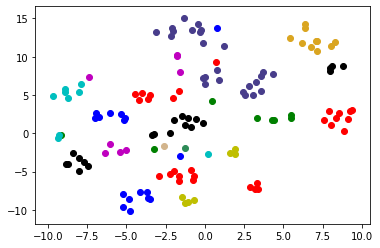

In [186]:
for i,x in enumerate(X):

    plt.scatter(X_2d[i, 0], X_2d[i, 1],c=senses[i]) 
    
plt.show()